In [1]:
%load_ext autoreload
%autoreload 2

In [14]:
import visualstimulation as vs
import expipe
import matplotlib.pylab as plt
import numpy as np
%matplotlib notebook

In [3]:
project_path = "C:\\apps\expipe-projects\probe_v1"

project = expipe.get_project(project_path)
actions = project.actions

In [4]:
actions

In [5]:
action = actions['1053-010319-8']

In [6]:
data_path = vs.get_data_path(action)

C:\apps\expipe-projects\probe_v1
actions\1053-010319-8\data\main.exdir


In [ ]:
epochs = vs.load_epochs(data_path)

In [ ]:
channel_idx = 0
sptr = vs.load_spiketrains(data_path, channel_idx)

In [ ]:
for st in sptr:
    print(st)

### How to plot spiketrains?

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
for i, st in enumerate(sptr):
    ax.plot(st.times, i * np.ones(len(st)), '|', ls='')

### How to plot waveforms?

In [ ]:
wf = sptr[0].waveforms
print(wf.shape)

In [ ]:
wf_mean = np.mean(wf, axis=0)
print(wf_mean.shape)

In [ ]:
plt.figure()
_ = plt.plot(wf_mean.T)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
for i, w in enumerate(wf_mean):
    _ = ax.plot(w + i*25, 'k')

### How to load LFP?

In [19]:
lfp = vs.load_LFP(data_path)

<IPython.core.display.Javascript object>


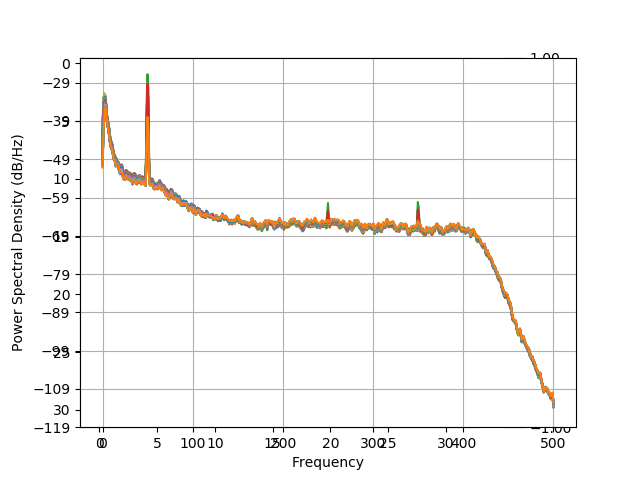

In [20]:
fig, ax = plt.subplots(1, 1)
im = ax.imshow(np.corrcoef(lfp), vmin=-1, vmax=1)
ax.axis(ax.axis('equal'))
fig.colorbar(im)

<IPython.core.display.Javascript object>


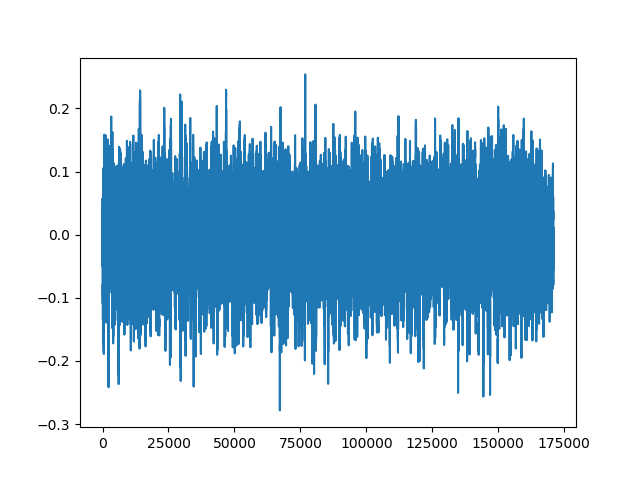

In [27]:
plt.figure()
plt.plot(lfp[0])

<IPython.core.display.Javascript object>


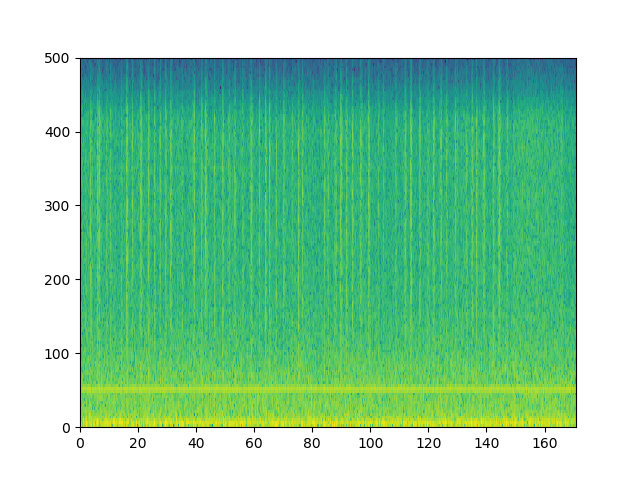

In [30]:
plt.figure()
_ = plt.specgram(np.array(lfp[0]), Fs=1000)

<IPython.core.display.Javascript object>


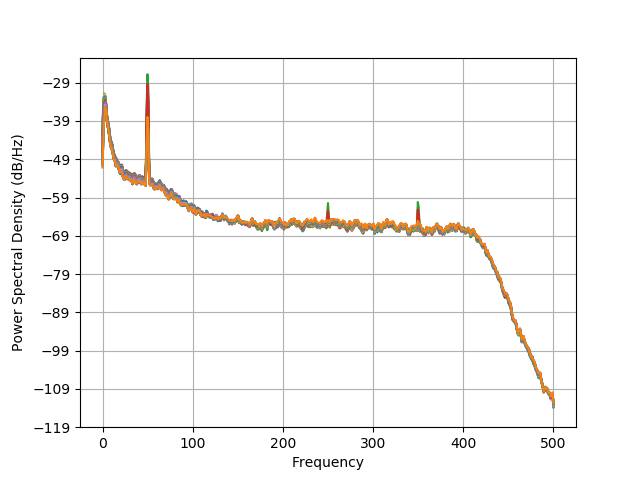

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111)
for ciao in lfp:
    _ = ax.psd(np.array(ciao), NFFT=1024, Fs=1000)

In [41]:
type(lfp)

neo.core.analogsignal.AnalogSignal

In [ ]:
oe_epoch = epochs[0]
ps_epoch = epochs[1]

In [ ]:
orients = ps_epoch.labels
print(orients)

In [ ]:
# make trials 
trials = vs.make_spiketrain_trials(sptr[1], oe_epoch)

In [ ]:
vs.add_orientation_to_trials(trials, orients)
print(trials[0].annotations)

In [ ]:
fig = vs.orient_raster_plots(trials)

In [ ]:
fig = vs.plot_tuning_overview(trials)

In [ ]:
import visualstimulation as vs
import os

In [ ]:
project = os.path.realpath("C:\\apps\\expipe-project\\MROS_V2")
action_id = "1823-060219-2"
o = vs.represent.visual_data(project, action_id)

In [ ]:
o_sptr = vs.load_spiketrains(str(o.data_path), 0)

In [ ]:
o.get_plot()